In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Task: __Exploratory Data Analysis (EDA)__ of car insurance dataset.

__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

***

In [212]:
df = pd.read_csv("./data/Car_Insurance_Claim.csv")
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


# `Data Cleaning`

The function `get_feature_types(df)` identifies numerical and categorical features in the given DataFrame.

The result contains a dictionary where:  
   - The key `"numerical_features"` holds a list of all numerical columns.  
   - The key `"categorical_features"` holds a list of all categorical columns.  


In [213]:
def get_feature_types(df):
    feature_types = {
        "numerical_features": df.select_dtypes(exclude=['object']).columns.tolist(),
        "categorical_features": df.select_dtypes(include=['object']).columns.tolist()
    }
    return feature_types

feature_types = get_feature_types(df)
print("Numerical Features:", feature_types["numerical_features"])
print("Categorical Features:", feature_types["categorical_features"])


Numerical Features: ['Unnamed: 0', 'ID']
Categorical Features: ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


The function `get_feature_types(df)` identified the numerical and categorical features in the dataset.  

### Observations:
- The function returned only **two numerical features**: `['Unnamed: 0', 'ID']`.  
- However, in reality, there are **10 numerical features** that were not recognized correctly:  
  - `VEHICLE_OWNERSHIP`, `MARRIED`, `CHILDREN`, `POSTAL_CODE`, `ANNUAL_MILEAGE`,  
  - `SPEEDING_VIOLATIONS`, `DUIS`, `PAST_ACCIDENTS`, `OUTCOME`,`CREDIT_SCORE`.  

### Next Step:
To correctly classify these features, I will:
1. **Check for missing values** in the dataset to identify columns containing `None` or `NaN`.  
2. **Remove unnecessary columns** such as `Unnamed` and `ID`, as they do not provide valuable information for the analysis.  
3. **Replace `None` and `NaN` values** with the mode (most frequent value) for each column.  
4. **Convert the affected columns to numerical data types** to ensure correct classification.  


In [214]:
df.isnull().sum()

Unnamed: 0                0
ID                        0
AGE                      50
GENDER                   50
RACE                     49
DRIVING_EXPERIENCE       50
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1022
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  48
CHILDREN                 50
POSTAL_CODE              50
ANNUAL_MILEAGE         1000
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

### Missing Values 

Missing values in the dataset:  

- The column with the most missing values is **CREDIT_SCORE** (1022 missing values).  
- **ANNUAL_MILEAGE** also has a significant number of missing values (1000).  
- Other columns, such as **AGE, GENDER, DRIVING_EXPERIENCE, VEHICLE_YEAR, and PAST_ACCIDENTS**, have exactly **50 missing values** each.  
- **RACE, EDUCATION, MARRIED, and VEHICLE_TYPE** have slightly fewer missing values (around 48-49).  

**Remove unnecessary columns** such as `Unnamed` and `ID`, as they do not provide valuable information for the analysis. 

In [215]:
df = df.drop(columns=["Unnamed: 0", "ID"]) 

**Replaces missing values**  `NaN` and the string `"none"` with the mode (most frequent value) for each column in the dataset.

In [216]:
categorical_columns = df.columns

df['CREDIT_SCORE'] = df['CREDIT_SCORE'].replace("none", 0) # We do this because the mode for 'CREDIT_SCORE' is NaN, so we treat "none" as 0

for col in categorical_columns:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].replace("none", mode_value).fillna(mode_value)

**Convert the affected columns to numerical data types** to ensure correct classification.  

In [217]:
columns_to_convert = [
    "VEHICLE_OWNERSHIP", "MARRIED", "CHILDREN", "POSTAL_CODE", "ANNUAL_MILEAGE", 
    "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME", "CREDIT_SCORE"
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce') 


In [218]:
feature_types = get_feature_types(df)
print("Numerical Features:", feature_types["numerical_features"])
print("Categorical Features:", feature_types["categorical_features"])

Numerical Features: ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']
Categorical Features: ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']


In [219]:
df.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

### After `Data Cleaning`, the dataset contains the following features:

##### Numerical Features:
- `CREDIT_SCORE`
- `VEHICLE_OWNERSHIP`
- `MARRIED`
- `CHILDREN`
- `POSTAL_CODE`
- `ANNUAL_MILEAGE`
- `SPEEDING_VIOLATIONS`
- `DUIS`
- `PAST_ACCIDENTS`
- `OUTCOME`

##### Categorical Features:
- `AGE`
- `GENDER`
- `RACE`
- `DRIVING_EXPERIENCE`
- `EDUCATION`
- `INCOME`
- `VEHICLE_YEAR`
- `VEHICLE_TYPE`


#### Missing Values:  
There are no more missing values in the dataset after replacing `None` and `NaN` with the mode for each column.

# `Descriptive Statistics`

Descriptive Statistics for `Categorical Features`

In [220]:
df.describe(include=['O']).T

,count,unique,top,freq
AGE,10000,4,26-39,3135
GENDER,10000,2,female,5067
RACE,10000,2,majority,9018
DRIVING_EXPERIENCE,10000,4,0-9y,3603
EDUCATION,10000,2,high school,6112
INCOME,10000,4,upper class,4336
VEHICLE_YEAR,10000,2,before 2015,6996
VEHICLE_TYPE,10000,2,sedan,9531


Descriptive Statistics for `Numerical Features`

In [221]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
CREDIT_SCORE,10000.0,0.46052,0.205823,0.0,0.368799,0.502621,0.60651,0.960819
VEHICLE_OWNERSHIP,10000.0,0.70070,0.457974,0.0,0.000000,1.000000,1.00000,1.000000
MARRIED,10000.0,0.49300,0.499976,0.0,0.000000,0.000000,1.00000,1.000000
CHILDREN,10000.0,0.69150,0.461897,0.0,0.000000,1.000000,1.00000,1.000000
POSTAL_CODE,10000.0,19779.16660,18869.452149,10238.0,10238.000000,10238.000000,32765.00000,92101.000000
ANNUAL_MILEAGE,10000.0,11625.10000,2676.876268,2000.0,10000.000000,11000.000000,13000.00000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.46710,2.233790,0.0,0.000000,0.000000,2.00000,22.000000
DUIS,10000.0,0.23650,0.552990,0.0,0.000000,0.000000,0.00000,6.000000
PAST_ACCIDENTS,10000.0,1.04680,1.648782,0.0,0.000000,0.000000,2.00000,15.000000
OUTCOME,10000.0,0.31050,0.462721,0.0,0.000000,0.000000,1.00000,1.000000


Unique Values in Each Column

In [222]:
unique_counts = pd.DataFrame(df.nunique(), columns=['Unique Values'])
print(unique_counts)

                     Unique Values
AGE                              4
GENDER                           2
RACE                             2
DRIVING_EXPERIENCE               4
EDUCATION                        2
INCOME                           4
CREDIT_SCORE                  8929
VEHICLE_OWNERSHIP                2
VEHICLE_YEAR                     2
MARRIED                          2
CHILDREN                         2
POSTAL_CODE                      4
ANNUAL_MILEAGE                  21
VEHICLE_TYPE                     2
SPEEDING_VIOLATIONS             21
DUIS                             7
PAST_ACCIDENTS                  15
OUTCOME                          2



<span style="color:red">A value of `0` in the `Credit_SCORE` column indicates that the person has never had credit.</span>

In [223]:
# Explore OUTCOME column
df['OUTCOME'].value_counts()

OUTCOME
0.0    6895
1.0    3105
Name: count, dtype: int64

The ratio of claims about `31%` (3105 out of 10000), which indicates that a significant portion of individuals have not made an insurance claim.

In [224]:
# Explore DRIVING_EXPERIENCE column
df['DRIVING_EXPERIENCE'].value_counts()

DRIVING_EXPERIENCE
0-9y      3603
10-19y    3264
20-29y    2093
30y+      1040
Name: count, dtype: int64

In [225]:
violation_columns = ["SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]

violation_counts = {col: df[col].value_counts() for col in violation_columns}
violation_df = pd.DataFrame(violation_counts)

postal_code_df = df["POSTAL_CODE"].value_counts().reset_index()
postal_code_df.columns = ["POSTAL_CODE", "COUNT"]

display(violation_df)
display(postal_code_df)


,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,5077,8141.0,5628.0
1,1531,1451.0,1763.0
2,1146,327.0,1092.0
3,824,68.0,640.0
4,527,10.0,364.0
5,315,2.0,230.0
6,186,1.0,143.0
7,138,NaN,61.0
8,74,NaN,41.0
9,48,NaN,18.0


,POSTAL_CODE,COUNT
0,10238.0,6970
1,32765.0,2429
2,92101.0,481
3,21217.0,120


### Observations  

#### 1. **Most Drivers Have No Violations**  
- **5077 drivers** have no speeding violations.  
- **8141 drivers** have no DUI incidents.  
- **5628 drivers** have not been involved in past accidents.  

#### 2. **Significant Imbalance in ZIP Code Distribution**  
- **10238** is the most common postal code, appearing in **6970 records** (~70% of the data).  
- **32765** is the second most frequent, with **2429 records**.  
- **92101 and 21217** are much less common, with only **481 and 120 records**, respectively.  

This imbalance may indicate a dataset bias toward specific regions 

`df_dummies = pd.get_dummies(df, drop_first=True)`:
   - This line is used to convert categorical columns in the DataFrame `df` into **dummy variables** (binary variables).
   - The `drop_first=True` argument ensures that the first category is dropped, avoiding multicollinearity in the data.
   - Example: If a column `MARRIED` has 'Yes' and 'No', the new columns will be `MARRIED_Yes` and `MARRIED_No`, but `MARRIED_Yes` will be dropped.

In [226]:
df_dummies = pd.get_dummies(df, drop_first=True)  
df_grouped = df_dummies.groupby('OUTCOME').mean()

df_grouped


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_26-39,...,RACE_minority,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
OUTCOME,,,,,,,,,,,,,,,,,,,,,
0.0,0.487432,0.815809,0.580276,0.763597,18595.944598,11306.598985,1.899347,0.305584,1.387672,0.303408,...,0.096302,0.361421,0.287890,0.148078,0.437418,0.092096,0.545613,0.137056,0.610442,0.046120
1.0,0.400760,0.445089,0.299195,0.531401,22406.643478,12332.367150,0.507246,0.083092,0.289855,0.335910,...,0.102415,0.248631,0.034783,0.006119,0.280837,0.379710,0.184863,0.247021,0.897585,0.048631


### A few observations from the data mean:
##### MARRIED:
- **0.0 (Claim not made)**: 58.03% are not married
- **1.0 (Claim made)**: 29.92% are not married
- **Conclusion**: Married people are less likely to file claims, while single individuals are more likely to submit them.

##### CHILDREN:
- **0.0 (Claim not made)**: 76.36% have children
- **1.0 (Claim made)**: 53.14% have children
- **Conclusion**: People with children are less likely to file a claim, while those without children are more inclined to do so.

##### ANNUAL_MILEAGE:
- **0.0 (Claim not made)**: Avg. annual mileage: 11,307 km
- **1.0 (Claim made)**: Avg. annual mileage: 12,332 km
- **Conclusion**: People who made claims have higher average mileage, indicating more frequent use of their vehicles and potentially greater risk.

##### SPEEDING_VIOLATIONS:
- **0.0 (Claim not made)**: Avg. violations: 1.89
- **1.0 (Claim made)**: Avg. violations: 0.51
- **Conclusion**: Claimants have fewer speeding violations on average, suggesting that safer drivers are more likely to file claims.

##### DUIS:
- **0.0 (Claim not made)**: Avg. DUIs: 0.31
- **1.0 (Claim made)**: Avg. DUIs: 0.08
- **Conclusion**: People who made claims have fewer DUIs, which may indicate that those who drive more responsibly are more likely to file.

##### PAST_ACCIDENTS:
- **0.0 (Claim not made)**: Avg. past accidents: 1.39
- **1.0 (Claim made)**: Avg. past accidents: 0.29
- **Conclusion**: Non-claimants have significantly more past accidents, highlighting higher risk.

##### AGE 26-39:
- **0.0 (Claim not made)**: 30.34% are in this age group
- **1.0 (Claim made)**: 33.59% are in this age group
- **Conclusion**: People aged 26-39 are the most represented among both claimants and non-claimants.



# `Data Visualization`

The following visualizations will be generated:

1. **Histograms of Numerical Variables**  
   - Purpose: To visually observe numerical data, understand its distribution.

2. **Pie Chart: Distribution of Insurance Claim Outcomes**
    - Purpose: To show the proportion of customers who filed insurance claims versus those who did not.

3. **Relationship Between OUTCOME, Credit Score, and Annual Mileage**  
   - Purpose: To analyze how credit scores and annual mileage vary based on the insurance claim outcome.

4. **Correlation Heatmap**  
   - Purpose: To identify correlations between numerical variables and determine which features are most related to the target variable 

5. **Categorical Variable Analysis**  
   - Purpose: To explore how categorical features (e.g., marital status, vehicle ownership) influence the likelihood of filing an insurance claim.



### 1. Histograms of Numerical Variables

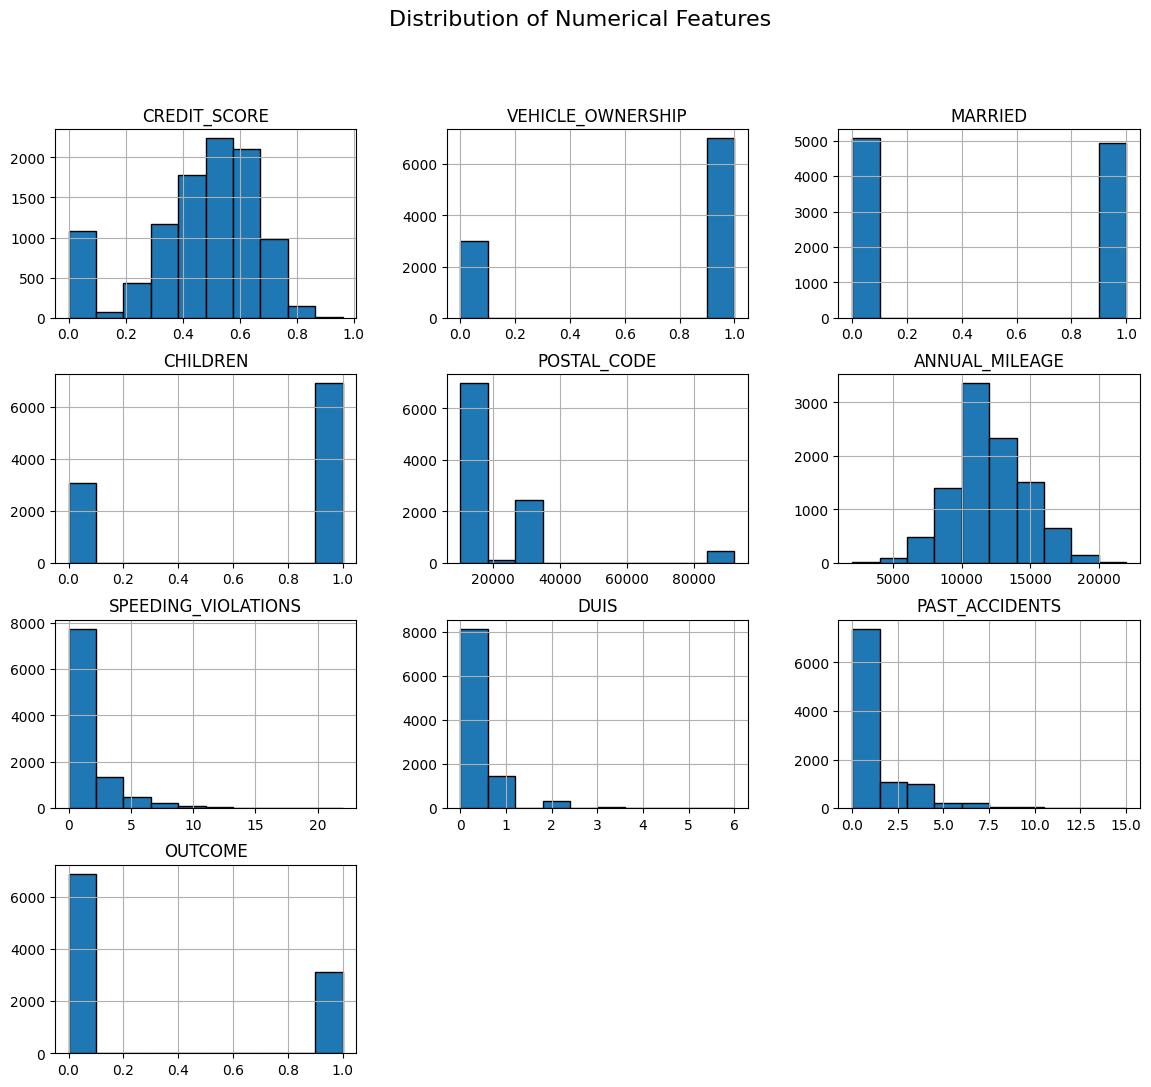

In [227]:
num_features = feature_types["numerical_features"]
df[num_features].hist(figsize=(14, 12),  edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

**Observations:**

- **CREDIT_SCORE:**
    - A significant number of customers have a credit score of 0, indicating a lack of credit history. 

- **VEHICLE_OWNERSHIP:** Most customers own a vehicle

- **MARRIED:** Approximately equal numbers of married and unmarried customers.

- **CHILDREN:** Most customers have children

- **POSTAL_CODE:** Multiple peaks suggest different groups of customers with different postal codes.

- **ANNUAL_MILEAGE:** The annual mileage distribution is approximately normal with a peak around 10,000 miles.

- **SPEEDING_VIOLATIONS:** Most customers have no speeding violations

- **DUIS:** Most customers have no DUIs

- **PAST_ACCIDENTS:** Most customers have no past accidents 


### 2. Distribution of Insurance Claim Outcomes

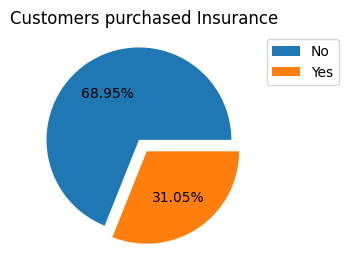

In [228]:
ax = df["OUTCOME"].value_counts().plot(kind='pie', figsize=(10,3), 
                                        grid=False, ylabel='',
                                        labels = ['No', 'Yes'], 
                                        explode=[0.1, 0.05],
                                        legend=True, labeldistance=None, 
                                        autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Customers purchased Insurance')
plt.show()

**Observations:**

- The majority of customers (68.95%) did not purchase insurance.
- Only 31.05% of customers purchased insurance.

### 3. Relationship Between OUTCOME, Credit Score, and Annual Mileage

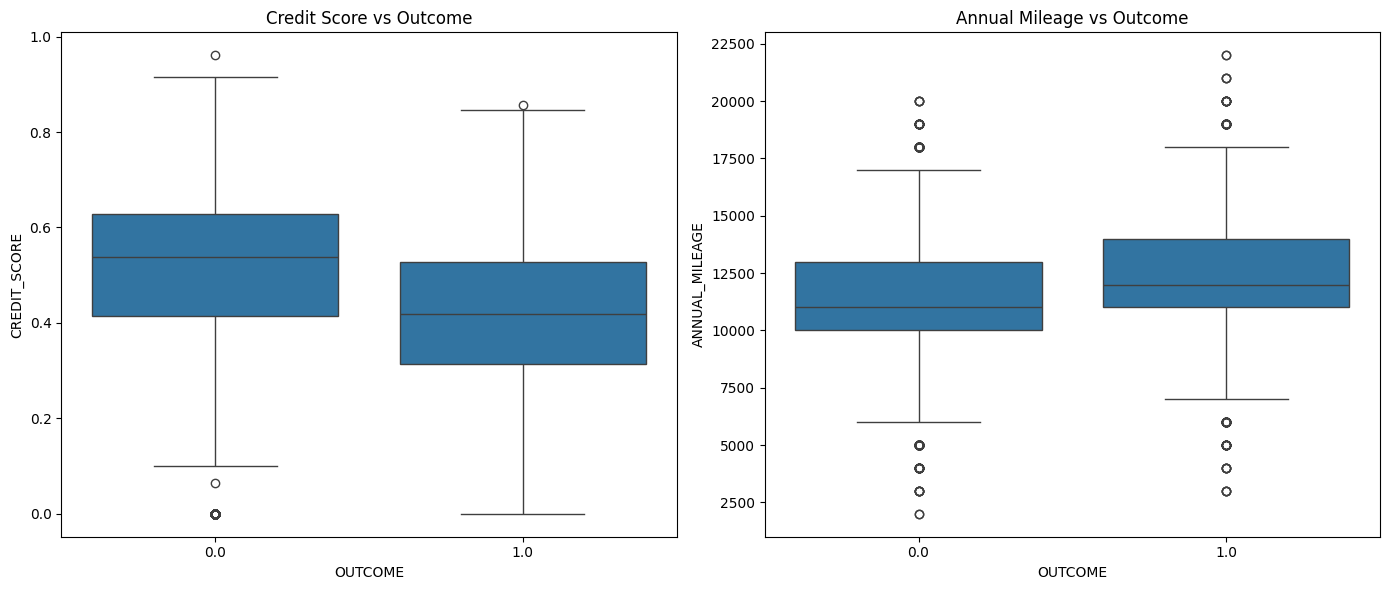

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='OUTCOME', y='CREDIT_SCORE', data=df, ax=axes[0])
axes[0].set_title("Credit Score vs Outcome")

sns.boxplot(x='OUTCOME', y='ANNUAL_MILEAGE', data=df, ax=axes[1])
axes[1].set_title("Annual Mileage vs Outcome")

plt.tight_layout()
plt.show()

**Observations of "Credit Score vs Outcome"**
- Higher credit scores correlate with lower claim probability.
- Lower credit scores correlate with higher claim probability.

**Observations of "Annual Mileage vs Outcome"**
- Higher annual mileage correlates with a slightly higher claim probability.
- Annual mileage may influence claim probability, but less strongly than credit score.

### 4. Correlation heatmap

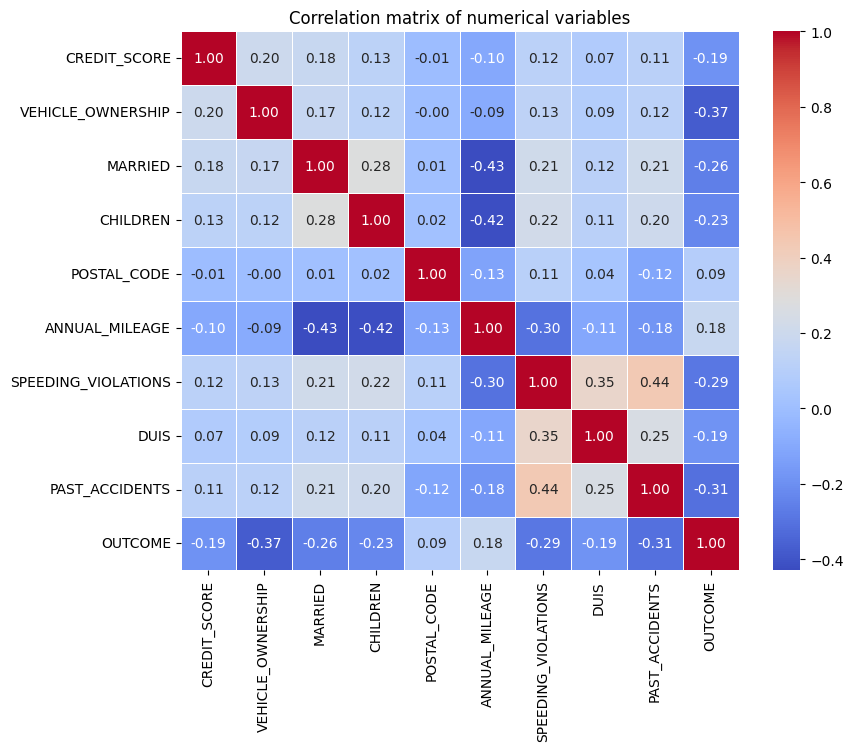

In [230]:
plt.figure(figsize=(9, 7))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix of numerical variables")
plt.show()


**Observations**

- **VEHICLE_OWNERSHIP (-0.37)**: People who own a vehicle are less likely to file claims.  
- **PAST_ACCIDENTS (-0.31)**: The more past accidents, the lower the likelihood of filing a claim (possibly due to more cautious behavior after accidents or increased insurance costs).  
- **SPEEDING_VIOLATIONS (-0.29)**: More speeding violations = lower likelihood of filing a claim.  
- **MARRIED (-0.26) and CHILDREN (-0.23)**: Married people with children are less likely to file insurance claims, possibly due to more responsible behavior.  

### 5. Categorical Variable Analysis

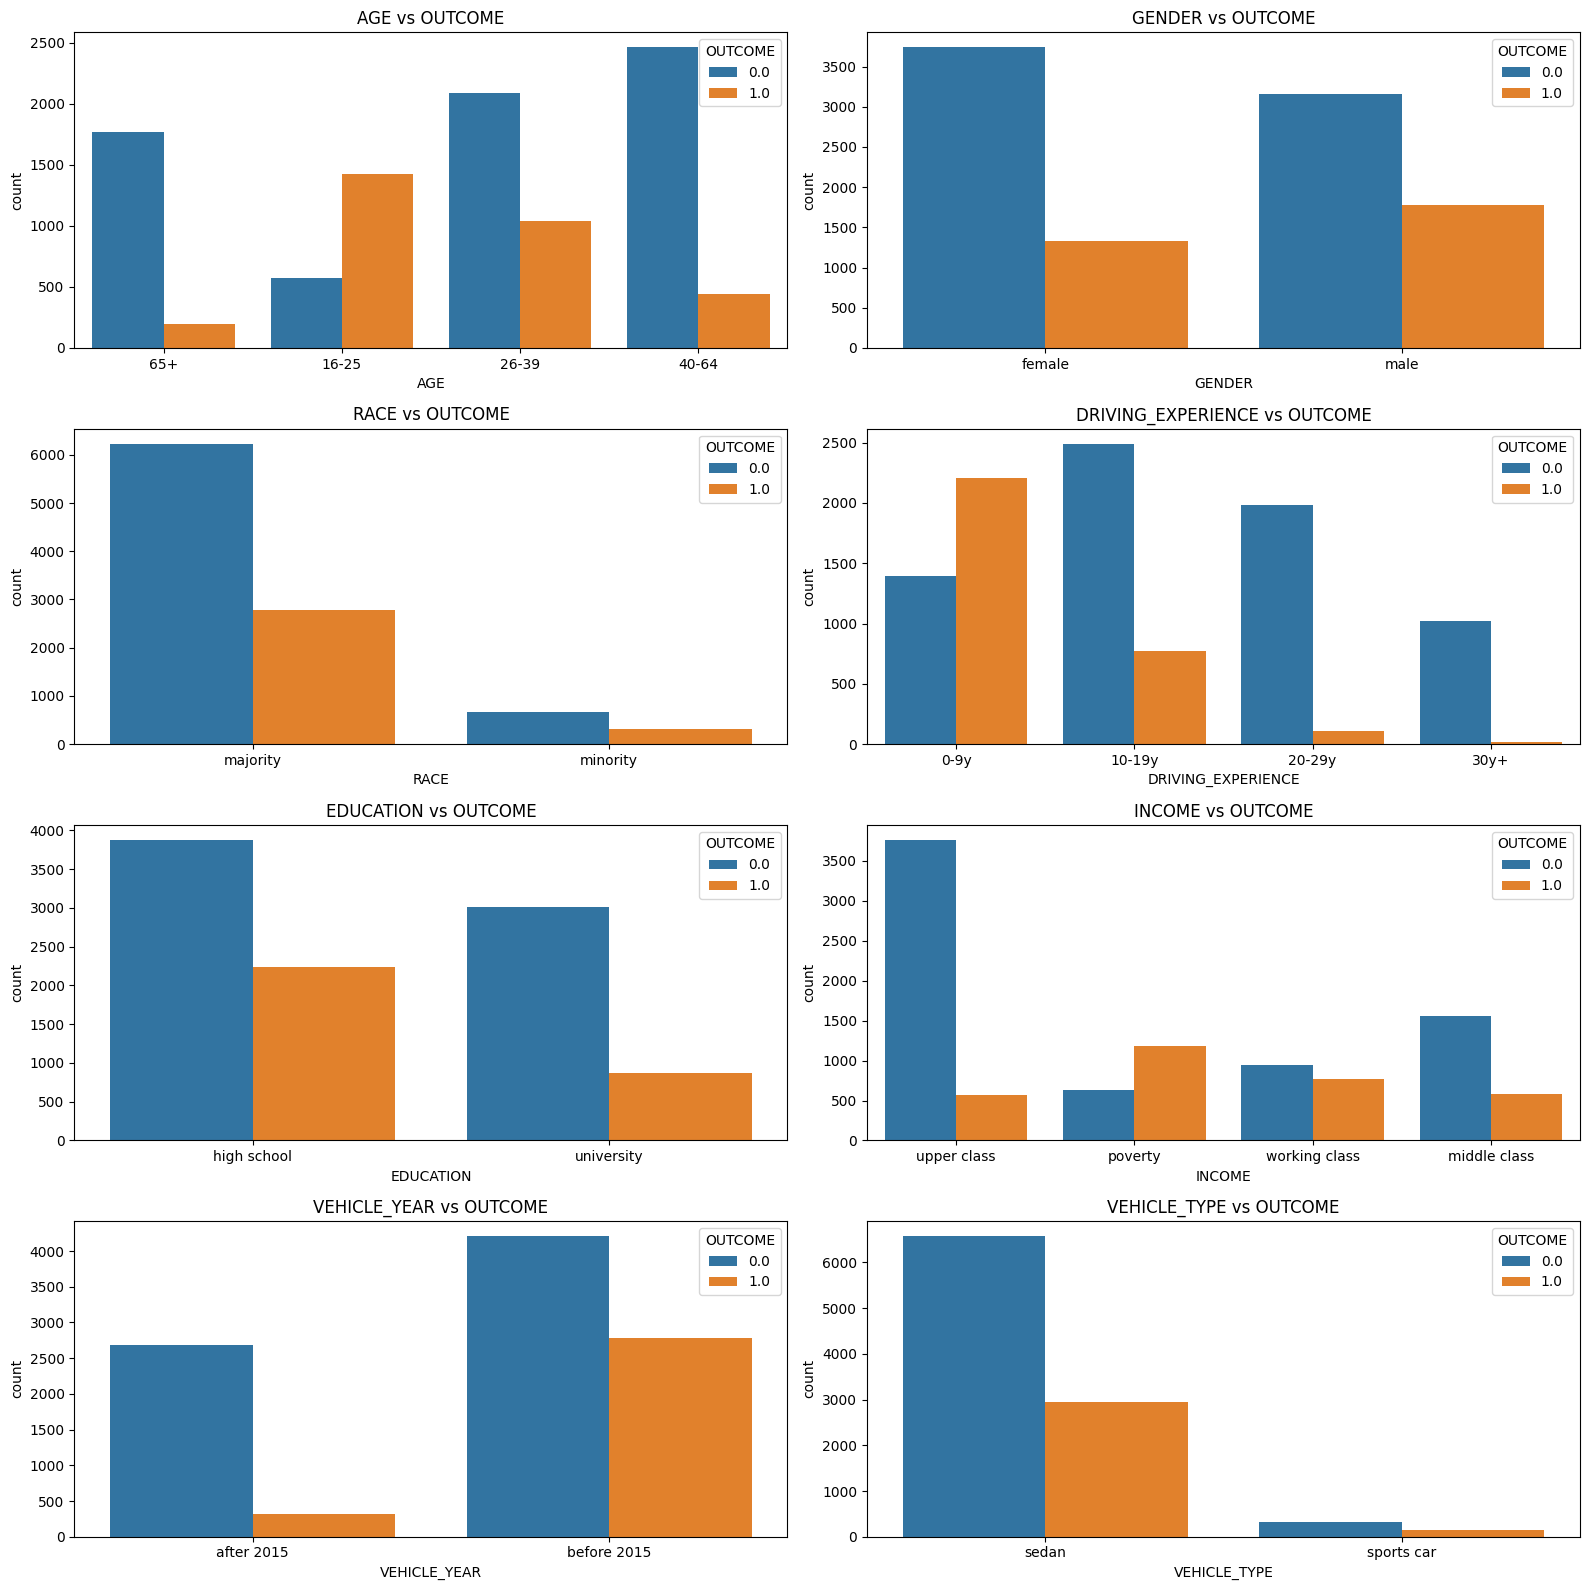

In [231]:
cat_features = feature_types["categorical_features"]
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, hue='OUTCOME', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"{col} vs OUTCOME")

plt.tight_layout()
plt.show()

**Observations**

- **AGE vs OUTCOME:**
    - Age group 16-25 has the highest number of insurance claims.
    - Age groups 26-39 and 40-64 have relatively high claim counts, but less than 16-25.
    - Age group 65+ has the lowest number of claims.

- **GENDER vs OUTCOME:**
    - Males have more insurance claims than females.

- **RACE vs OUTCOME:**
    - The "majority" group has significantly more claims than the "minority" group.

- **DRIVING EXPERIENCE vs OUTCOME:**
    - The 0-9 years driving experience group has the highest number of claims.
    - Claim counts decrease with increasing driving experience.

- **EDUCATION vs OUTCOME:**
    - Individuals with university education have more claims than those with high school education.

- **INCOME vs OUTCOME:**
    - The "working class" group has the highest number of claims.
    - "Upper class" and "middle class" groups have fewer claims.
    - The "poverty" group has the fewest claims.

- **VEHICLE YEAR vs OUTCOME:**
    - Vehicles made before 2015 have more claims than those made after 2015.

- **VEHICLE TYPE vs OUTCOME:**
    - Sedans have significantly more claims than sports cars.

# `Conclusion`

The analysis of car insurance claims data reveals several key factors that influence the likelihood of filing a claim:

1. **Demographic Factors**:
   - **Marital Status**: Single individuals are more likely to file claims compared to married ones, possibly due to higher risk-taking behavior among them.
   - **Children**: People without children are more inclined to file claims, which could be related to different driving habits, as parents may drive more cautiously.
   - **Age**: Younger drivers (16-25 years old) have more claims, likely due to less experience and a higher tendency to engage in risky driving.

2. **Risk Factors**:
   - **Speeding Violations and DUIs**: Drivers with speeding violations and DUIs are less likely to file claims, possibly indicating that they are more cautious or concerned about the consequences.
   - **Past Accidents**: Individuals with a history of accidents are less likely to file new claims, which may suggest increased caution or higher insurance costs due to prior incidents.

3. **Vehicle-related Factors**:
   - **Annual Mileage**: Drivers with higher annual mileage are more likely to file claims, suggesting that increased vehicle usage correlates with higher risk.
   - **Vehicle Age**: Owners of older vehicles (pre-2015) file more claims, possibly due to more frequent breakdowns or greater accident risk with older cars.

4. **Socioeconomic Factors**:
   - **Credit Score**: Individuals with lower credit scores are more likely to file claims, which might reflect financial difficulties or a greater need for compensation.
   - **Income**: People in the working and lower income brackets are more likely to file claims, which could be due to having more vehicles and higher insurance costs.

5. **Gender and Other Factors**:
   - **Gender**: Males are more likely to file claims than females, potentially due to higher risk-taking behavior or greater vehicle ownership.
   - **Education**: Individuals with higher education levels tend to file more claims, likely due to greater vehicle ownership and more frequent driving.

**Understanding these factors can help the company better assess risks, optimize our policies, and offer more personalized insurance products to customers.**